### Group 11
[EMNIST introduction video](https://www.youtube.com/watch?v=pp1cBwK-FAM&feature=youtu.be&fbclid=IwAR3eB7nDsFUWycVhr-pkliIpOY2qwlBAUst9dwwICEnlMDZYrl47aGPWh6E)

In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import random
 
tf.__version__

'2.2.0'

In [ ]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## MNIST

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = (x_train/255.0, x_test/255.0)

print(f'x_train length: {len(x_train)}')
print(f'x_test length: {len(x_test)}')
print(f'image shape: {x_train[0].shape}')

AttributeError: ignored

In [ ]:
model0 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model0.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model0.fit(x_train, y_train, epochs=5)
model0.evaluate(x_test, y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2936 - accuracy: 0.9144
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1404 - accuracy: 0.9578
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1065 - accuracy: 0.9675
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0863 - accuracy: 0.9731
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0711 - accuracy: 0.9780
313/313 - 0s - loss: 0.0760 - accuracy: 0.9762


[0.07600472122430801, 0.9761999845504761]

## EMNIST

In [ ]:
!pip install emnist

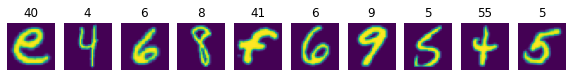

In [ ]:
from emnist import extract_training_samples
emnist_images, emnist_labels = extract_training_samples('byclass')
plt.figure(figsize=(10,10))
for i in range(10):
  randIndex = random.randint(0, len(emnist_images))
  plt.subplot(1,10,i+1)
  plt.imshow(emnist_images[randIndex])
  plt.title(emnist_labels[randIndex])
  plt.axis('off')

In [ ]:
# preprocess
emnist_images = tf.reshape(emnist_images, (emnist_images.shape[0], emnist_images.shape[1], emnist_images.shape[2], 1))
emnist_images = tf.cast(emnist_images, tf.float32)
# split
split = int(len(emnist_images)*0.9)
x_train = emnist_images[:split]
x_test = emnist_images[split:]
y_train = emnist_labels[:split]
y_test = emnist_labels[split:]
# normalize
x_train, x_test = (x_train/255.0, x_test/255.0)

print(f'emnist training image shape: {x_train.shape}')

emnist training image shape: (628138, 28, 28, 1)


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(28*28*2, kernel_size=(3,3), activation='relu'),  # (26,26)
  tf.keras.layers.MaxPool2D(pool_size=(2,2)), # (13,13)
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(28*28*3, kernel_size=(3,3), activation='relu'), # (11,11)
  tf.keras.layers.MaxPool2D(pool_size=(2,2)), # (5,5)
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(62, activation='softmax')
])
 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
checkpoints = tf.keras.callbacks.ModelCheckpoint(filepath='drive/My Drive/byclass.h5')

history = model.fit(x_train, y_train, epochs=20, batch_size=200, callbacks=checkpoints)

Epoch 1/20
3141/3141 [==============================] - 967s 308ms/step - loss: 0.5159 - accuracy: 0.8269
Epoch 2/20
3141/3141 [==============================] - 955s 304ms/step - loss: 0.3960 - accuracy: 0.8565
Epoch 3/20
3141/3141 [==============================] - 954s 304ms/step - loss: 0.3706 - accuracy: 0.8634
Epoch 4/20
3141/3141 [==============================] - 955s 304ms/step - loss: 0.3541 - accuracy: 0.8679
Epoch 5/20
3141/3141 [==============================] - 954s 304ms/step - loss: 0.3409 - accuracy: 0.8712
Epoch 6/20
3141/3141 [==============================] - 954s 304ms/step - loss: 0.3297 - accuracy: 0.8745
Epoch 7/20
3141/3141 [==============================] - 954s 304ms/step - loss: 0.3197 - accuracy: 0.8772
Epoch 8/20
3141/3141 [==============================] - 955s 304ms/step - loss: 0.3111 - accuracy: 0.8798
Epoch 9/20
3141/3141 [==============================] - 954s 304ms/step - loss: 0.3031 - accuracy: 0.8820
Epoch 10/20
3141/3141 [=======================

KeyboardInterrupt: ignored

## prediction

In [ ]:
model = tf.keras.models.load_model('drive/My Drive/byclass.h5')
model.evaluate(x_test, y_test, verbose=2)

2182/2182 - 138s - loss: 0.3696 - accuracy: 0.8694


[0.36956459283828735, 0.8694157004356384]

In [ ]:
# dictionary
keys = range(62)
v_num = range(48, 58)
v_cap_letter = range(65, 91)
v_letter = range(97, 123)
values = [chr(ii) for i in [v_num, v_cap_letter, v_letter] for ii in i]

mapping = dict(zip(keys, values))

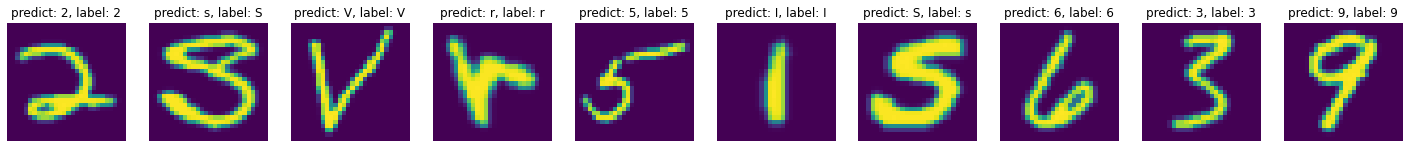

In [ ]:
plt.figure(figsize=(25,25))
for i in range(10):
  randIndex = random.randint(0, len(x_test))
  pick = x_test[randIndex]
  pick = tf.reshape(pick, (1, pick.shape[0], pick.shape[1], pick.shape[2]))
  predict = model.predict(pick)
  predict = np.argmax(predict)

  plt.subplot(1,10,i+1)
  pick_plot = np.reshape(pick, (28,28))
  plt.imshow(pick_plot)
  plt.title(f'predict: {mapping[predict]}, label: {mapping[y_test[randIndex]]}')
  plt.axis('off')
plt.show()